In [1]:
import os
import sys
print(os.getcwd())
sys.path.append("../WanPy")

from WanPy import *
from pythtb import *
from pythTB_wan import *
import models
import plotting as plot

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

/Users/treycole/Codes/WanPy/dev notebooks


Fourier transform Bloch Hamiltonian to real space throughout BZ. Fourier transform again at any $k$ point you want to get interpolated bands

In [4]:
delta = 1
t0 = 0.4
tprime = 0.5

n_super_cell = 4
model = models.chessboard(t0, tprime, delta).make_supercell([[n_super_cell, 0], [0, n_super_cell]])

low_E_sites = np.arange(0, model.get_num_orbitals(), 2)
high_E_sites = np.arange(1, model.get_num_orbitals(), 2)
lat_vecs = model.get_lat()
orb_vecs = model.get_orb()

n_orb = model.get_num_orbitals()
n_occ = int(n_orb/2)

u_wfs_full = wf_array(model, [20, 20])
u_wfs_full.solve_on_grid([0, 0])
chern = u_wfs_full.berry_flux([i for i in range(n_occ)])/(2*np.pi)

print(f"Low energy sites: {low_E_sites}")
print(f"High energy sites: {high_E_sites}")
print(f"# of occupied bands: {n_occ}")
print(f"Chern #: {chern: .1f}")

Low energy sites: [ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30]
High energy sites: [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31]
# of occupied bands: 16
Chern #: -1.0


In [6]:
random = False
low_E = False

if random:
    omit_num = 1
    n_tfs = n_occ - omit_num
    tf_list = ["random", n_tfs]
else:
    omit_sites = 6
    tf_list = list(np.setdiff1d(low_E_sites, [omit_sites])) # delta on lower energy sites omitting the last site
    # np.random.choice(low_E_sites, n_tfs, replace=False)
    n_tfs = len(tf_list)
if low_E:
    tf_list = list(low_E_sites)
    n_tfs = len(tf_list)

Wan_frac = n_tfs/n_occ
print(f"Wannier fraction: {Wan_frac}")

Wannier fraction: 0.9375


Wannier function report:
 --------------- 
Quadratic spread = [0.35519447 0.40476359 0.35519447 0.39072018 0.4127863  0.39072018
 0.35519447 0.4127863  0.42213565 0.4127863  0.40476359 0.39072018
 0.4127863  0.39072018 0.35519447]
Omega_i = 4.402553488045214
Omega_tilde = 1.4639131665574494
Wannier centers = [[-1.12368555e-17 -1.32518219e-02]
 [-9.91162440e-18  1.00000000e+00]
 [ 6.84702744e-18  2.01325182e+00]
 [ 9.94590870e-01 -5.40912993e-03]
 [ 9.96791446e-01  1.00000000e+00]
 [ 9.94590870e-01  2.00540913e+00]
 [ 9.86748178e-01  3.00000000e+00]
 [ 2.00000000e+00 -3.20855428e-03]
 [ 2.00000000e+00  1.00000000e+00]
 [ 2.00000000e+00  2.00320855e+00]
 [ 2.00000000e+00  3.00000000e+00]
 [ 3.00540913e+00 -5.40912993e-03]
 [ 3.00320855e+00  1.00000000e+00]
 [ 3.00540913e+00  2.00540913e+00]
 [ 3.01325182e+00  3.00000000e+00]]


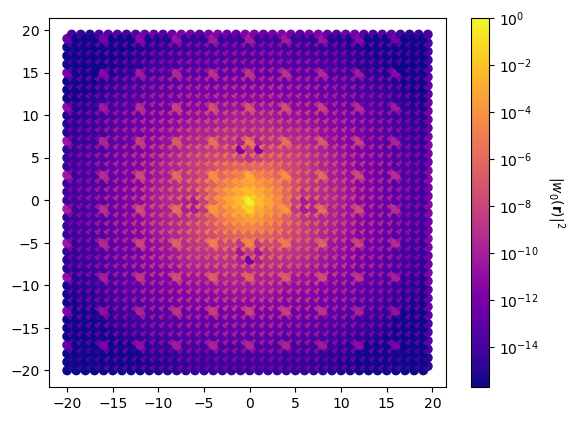

In [7]:
nkx, nky = 10, 10
Nk = nkx * nky
WFs = Wannier(model, [nkx, nky])
WFs.Wannierize(tf_list)
WFs.plot(0)
WFs.report()

0 Omega_I: 4.397582916696069
1 Omega_I: 4.393604105408725
2 Omega_I: 4.390152588243438
3 Omega_I: 4.387044873055834
4 Omega_I: 4.38418182598387
5 Omega_I: 4.381501771775625
6 Omega_I: 4.378963060226808
7 Omega_I: 4.37653602645945
8 Omega_I: 4.374198736202564
9 Omega_I: 4.371934511519315
10 Omega_I: 4.36973039019263
11 Omega_I: 4.367576116743872
12 Omega_I: 4.36546345544727
13 Omega_I: 4.363385708105871
14 Omega_I: 4.3613373670786535
15 Omega_I: 4.359313860439163
16 Omega_I: 4.357311361463698
17 Omega_I: 4.355326644033822
18 Omega_I: 4.353356971328867
19 Omega_I: 4.351400009138597
20 Omega_I: 4.34945375750261
21 Omega_I: 4.347516496326959
22 Omega_I: 4.345586741591211
23 Omega_I: 4.343663209879879
24 Omega_I: 4.341744789281089
25 Omega_I: 4.339830515458056
26 Omega_I: 4.337919551675497
27 Omega_I: 4.33601117217005
28 Omega_I: 4.334104748046127
29 Omega_I: 4.332199735410434
30 Omega_I: 4.330295665158513
31 Omega_I: 4.328392134312068
32 Omega_I: 4.326488798455465
33 Omega_I: 4.32458536528

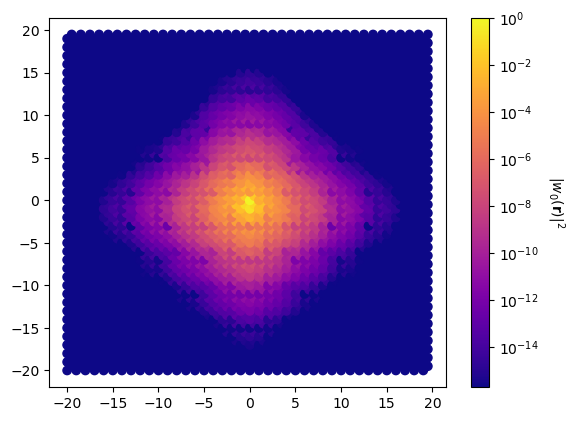

In [8]:
WFs.max_loc(
    outer_state_idxs="occupied", verbose=True, eps=1e-4, 
    iter_num_omega_i=10000, iter_num_omega_til=50000, 
    tol_omega_i=1e-3, tol_omega_til=1e-3, grad_min=10
    )
WFs.plot(0)
WFs.report()

In [12]:
u_wfs = WFs.energy_eigstates.get_states()["Cell periodic"]
psi_wfs = WFs.energy_eigstates.get_states()["Bloch"]
tilde_states = WFs.get_tilde_states()
u_tilde = tilde_states["Cell periodic"]
psi_tilde = tilde_states["Bloch"]

H_k = WFs.get_Bloch_Ham()
H_tilde_k = u_wfs[..., :, :].conj() @ H_k @ np.transpose(u_wfs[..., : ,:], axes=(0,1,3,2))
H_rot_k = u_tilde[..., :, :].conj() @ H_k @ np.transpose(u_tilde[..., : ,:], axes=(0,1,3,2))

In [13]:
k_mesh = WFs.K_mesh.full_mesh
k_idx_arr = WFs.K_mesh.idx_arr

supercell = np.array([
    (i,j) 
    for i in range(-int((nkx-nkx%2)/2), int((nkx-nkx%2)/2)) for j in range(-int((nky-nky%2)/2), int((nky-nky%2)/2))
    ])

H_recip = H_rot_k
H_R = np.zeros((supercell.shape[0], H_recip.shape[-1], H_recip.shape[-1]), dtype=complex)

for idx, (x, y) in enumerate(supercell):
    for k_idx in k_idx_arr:
        R_vec = np.array([x, y])
        phase = np.exp(-1j * 2 * np.pi * np.vdot(k_mesh[k_idx], R_vec))
        H_R[idx, :, :] += H_recip[k_idx] * phase / Nk

In [14]:
nk = 101
k_path = [[0.0, 0.0], [0.0, 0.5], [0.5, 0.5], [0.0, 0.0]]
(k_vec, k_dist, k_node) = model.k_path(k_path, nk, report=False)

H_k_interp = np.zeros((k_vec.shape[0], H_R.shape[-1], H_R.shape[-1]), dtype=complex)

for k_idx, k in enumerate(k_vec):
    for idx, (x, y) in enumerate(supercell):
        R_vec = np.array([x, y])
        print(k, R_vec)
        phase = np.exp(1j * 2 * np.pi * np.vdot(k, R_vec))
        H_k_interp[k_idx] += H_R[idx] * phase

[0. 0.] [-5 -5]
[0. 0.] [-5 -4]
[0. 0.] [-5 -3]
[0. 0.] [-5 -2]
[0. 0.] [-5 -1]
[0. 0.] [-5  0]
[0. 0.] [-5  1]
[0. 0.] [-5  2]
[0. 0.] [-5  3]
[0. 0.] [-5  4]
[0. 0.] [-4 -5]
[0. 0.] [-4 -4]
[0. 0.] [-4 -3]
[0. 0.] [-4 -2]
[0. 0.] [-4 -1]
[0. 0.] [-4  0]
[0. 0.] [-4  1]
[0. 0.] [-4  2]
[0. 0.] [-4  3]
[0. 0.] [-4  4]
[0. 0.] [-3 -5]
[0. 0.] [-3 -4]
[0. 0.] [-3 -3]
[0. 0.] [-3 -2]
[0. 0.] [-3 -1]
[0. 0.] [-3  0]
[0. 0.] [-3  1]
[0. 0.] [-3  2]
[0. 0.] [-3  3]
[0. 0.] [-3  4]
[0. 0.] [-2 -5]
[0. 0.] [-2 -4]
[0. 0.] [-2 -3]
[0. 0.] [-2 -2]
[0. 0.] [-2 -1]
[0. 0.] [-2  0]
[0. 0.] [-2  1]
[0. 0.] [-2  2]
[0. 0.] [-2  3]
[0. 0.] [-2  4]
[0. 0.] [-1 -5]
[0. 0.] [-1 -4]
[0. 0.] [-1 -3]
[0. 0.] [-1 -2]
[0. 0.] [-1 -1]
[0. 0.] [-1  0]
[0. 0.] [-1  1]
[0. 0.] [-1  2]
[0. 0.] [-1  3]
[0. 0.] [-1  4]
[0. 0.] [ 0 -5]
[0. 0.] [ 0 -4]
[0. 0.] [ 0 -3]
[0. 0.] [ 0 -2]
[0. 0.] [ 0 -1]
[0. 0.] [0 0]
[0. 0.] [0 1]
[0. 0.] [0 2]
[0. 0.] [0 3]
[0. 0.] [0 4]
[0. 0.] [ 1 -5]
[0. 0.] [ 1 -4]
[0. 0.] [ 1 -3]
[0

Text(0, 0.5, 'Energy $E(\\mathbf{{k}})$ ')

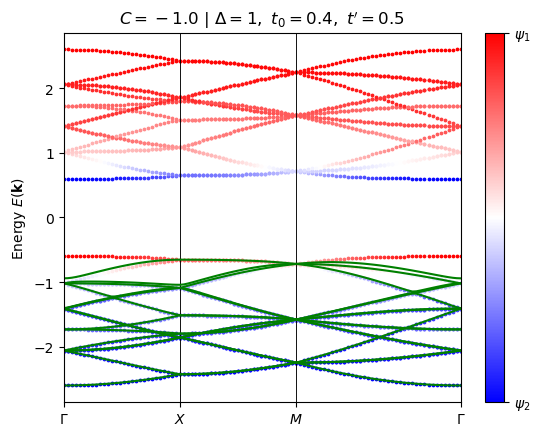

In [15]:
k_label = (r'$\Gamma $',r'$X$', r'$M$', r'$\Gamma $')
title = (rf"$C = {chern: .1f}$ | $\Delta = {delta},\ t_0 = {t0},\ t' = {tprime}$")
fig, ax = plot.plot_bands(
    model, k_path=k_path, k_label=k_label, sub_lat=True, red_lat_idx=high_E_sites, title=title)

evals, evecs = np.linalg.eigh(H_k_interp)
n_eigs = evals.shape[-1]

ax.set_xlim(0, k_node[-1])
ax.set_xticks(k_node)
if k_label is not None:
    ax.set_xticklabels(k_label)
for n in range(len(k_node)):
    ax.axvline(x=k_node[n], linewidth=0.5, color='k')

# if evecs is None and evals is None:
#     # must diagonalize model on interpolated path
#     # generate k-path and labels

#     # diagonalize
#     evals, evecs = model.solve_all(k_vec, eig_vectors=True)
#     evecs = np.transpose(evecs, axes=(1, 0, 2)) #[k, n, orb]
#     evals = np.transpose(evals, axes=(1, 0)) #[k, n]

# n_eigs = evecs.shape[1]

# if sub_lat:
#     # scattered bands with sublattice color
#     for k in range(nk):
#         for n in range(n_eigs): # band idx
#             # color is weight on all high energy (odd) sites in unit cell
#             col = sum([ abs(evecs[k, n, i])**2 for i in red_lat_idx ])
#             scat = ax.scatter(k_dist[k], evals[k, n], c=col, cmap='bwr', marker='o', s=3, vmin=0, vmax=1)

#     cbar = fig.colorbar(scat, ticks=[1,0])
#     cbar.ax.set_yticklabels([r'$\psi_1$', r'$\psi_2$'])
#     cbar.ax.get_yaxis().labelpad = 20


# continuous bands
for n in range(n_eigs):
    ax.plot(k_dist, evals[:, n], c='green')

ax.set_title(title)
ax.set_ylabel(r"Energy $E(\mathbf{{k}})$ ")